In [1]:
import pandas as pd

## Food Data Cleaning

In [2]:
df = pd.read_csv('USDA-Agricultural-Production.csv', index_col=0)

In [17]:
df.head(10)

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
0,"Almonds, Shelled Basis",GR,Greece,1983,Beginning Stocks,(MT),0.0,198400
1,"Almonds, Shelled Basis",GR,Greece,1983,Domestic Consumption,(MT),9700.0,198400
2,"Almonds, Shelled Basis",GR,Greece,1983,Ending Stocks,(MT),345.0,198400
3,"Almonds, Shelled Basis",GR,Greece,1983,Exports,(MT),4300.0,198400
4,"Almonds, Shelled Basis",GR,Greece,1983,Imports,(MT),45.0,198400
5,"Almonds, Shelled Basis",GR,Greece,1983,Production,(MT),14300.0,198400
6,"Almonds, Shelled Basis",GR,Greece,1983,Total Distribution,(MT),14345.0,198400
7,"Almonds, Shelled Basis",GR,Greece,1983,Total Supply,(MT),14345.0,198400
8,"Almonds, Shelled Basis",GR,Greece,1984,Beginning Stocks,(MT),345.0,198500
9,"Almonds, Shelled Basis",GR,Greece,1984,Domestic Consumption,(MT),11500.0,198500


In [21]:
df = df[df['Attribute_Description'] == 'Production']

In [91]:
foods = ['Wheat', 'Corn', 'Rice, Milled']
df = df[df['Commodity_Description'].isin(foods)]

In [92]:
df.reset_index(drop=True, inplace=True)
df

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
0,Corn,AF,Afghanistan,1960,Production,(1000 MT),700.0,200607
1,Corn,AF,Afghanistan,1961,Production,(1000 MT),700.0,200607
2,Corn,AF,Afghanistan,1962,Production,(1000 MT),700.0,200607
3,Corn,AF,Afghanistan,1963,Production,(1000 MT),713.0,200607
4,Corn,AF,Afghanistan,1964,Production,(1000 MT),720.0,200607
...,...,...,...,...,...,...,...,...
119134,Wheat,RH,Zimbabwe,2017,Production,(1000 MT),158.0,202203
119135,Wheat,RH,Zimbabwe,2018,Production,(1000 MT),170.0,202203
119136,Wheat,RH,Zimbabwe,2019,Production,(1000 MT),95.0,202203
119137,Wheat,RH,Zimbabwe,2020,Production,(1000 MT),213.0,202203


In [93]:
df.to_csv('USDA-Staples.csv')

In [95]:
df['Seen_On'] = pd.Series([pd.to_datetime(x, format='%Y%m') for x in df['Seen_On']])

C:\Users\josep\AppData\Local\Temp\ipykernel_16428\3173993778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seen_On'] = pd.Series([pd.to_datetime(x, format='%Y%m') for x in df['Seen_On']])


In [104]:
len(df.loc[df['Year'] == 2021, 'Country_Name'].unique())
len(df.Country_Name.unique())

187

## Population Data Cleaning

In [105]:
pop = pd.read_csv('world_population.csv')

In [114]:
pop = pop[['Country/Territory', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Growth Rate']]
pop.head()

,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,1.0257
1,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,0.9957
2,Algeria,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,1.0164
3,American Samoa,44273,46189,51368,54849,58230,47818,32886,27075,0.9831
4,Andorra,79824,77700,71746,71519,66097,53569,35611,19860,1.0100


In [116]:
pop.to_csv('population-cleaned.csv')

## Try Linear Regression

In [2]:
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
#remove pandas import if already imported above.

In [3]:
pop2 = pd.read_csv('population-cleaned.csv')
food2 = pd.read_csv('USDA-Staples.csv')

In [4]:
food2

,Unnamed: 0,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Seen_On
0,0,Corn,AF,Afghanistan,1960,Production,(1000 MT),700.0,200607
1,1,Corn,AF,Afghanistan,1961,Production,(1000 MT),700.0,200607
2,2,Corn,AF,Afghanistan,1962,Production,(1000 MT),700.0,200607
3,3,Corn,AF,Afghanistan,1963,Production,(1000 MT),713.0,200607
4,4,Corn,AF,Afghanistan,1964,Production,(1000 MT),720.0,200607
...,...,...,...,...,...,...,...,...,...
119134,119134,Wheat,RH,Zimbabwe,2017,Production,(1000 MT),158.0,202203
119135,119135,Wheat,RH,Zimbabwe,2018,Production,(1000 MT),170.0,202203
119136,119136,Wheat,RH,Zimbabwe,2019,Production,(1000 MT),95.0,202203
119137,119137,Wheat,RH,Zimbabwe,2020,Production,(1000 MT),213.0,202203


In [15]:
popWfoodinfo_2020 = pop2[pop2['Country/Territory'].isin(food2.loc[food2['Year'] == 2020, 'Country_Name'])]
popWfoodinfo_2020
# plt.scatter(
    # df.loc[df['Country_Name'].isin(popWfoodinfo['Country/Territory']) & (df['Commodity_Description'] == 'Corn') & (df['Year'] == 2020), 'Value'], 
    # popWfoodinfo.loc[:, '2020 Population']
    # )

,Unnamed: 0,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate
0,0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,1.0257
1,1,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,0.9957
2,2,Algeria,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,1.0164
5,5,Angola,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1.0315
8,8,Argentina,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,1.0052
...,...,...,...,...,...,...,...,...,...,...,...
227,227,Venezuela,28301696,28490453,30529716,28715022,24427729,19750579,15210443,11355475,1.0036
228,228,Vietnam,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,1.0074
231,231,Yemen,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,1.0217
232,232,Zambia,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,1.0280


In [6]:
# food2.drop(columns="Seen_On", inplace=True)
food2_2020 = food2.loc[food2['Country_Name'].isin(popWfoodinfo_2020['Country/Territory']) & (food2['Year'] == 2020)].groupby('Country_Name')['Value'].sum()
food2_2020

Country_Name
Afghanistan      78275.0
Albania          10332.0
Algeria          66016.0
Angola           36868.0
Argentina      1419032.0
                 ...    
Venezuela         8951.0
Vietnam         625530.0
Yemen             2590.0
Zambia           45664.0
Zimbabwe         16172.0
Name: Value, Length: 131, dtype: float64

In [17]:
popWfoodinfo_2015 = pop2[pop2['Country/Territory'].isin(food2.loc[food2['Year'] == 2015, 'Country_Name'])]
food2_2015 = food2.loc[food2['Country_Name'].isin(popWfoodinfo_2015['Country/Territory']) & (food2['Year'] == 2015)].groupby('Country_Name')['Value'].sum()
food2_2015

Country_Name
Afghanistan      83636.0
Albania          10635.0
Algeria          48116.0
Angola           19658.0
Argentina      1024975.0
                 ...    
Venezuela        24280.0
Vietnam         916774.0
Yemen             4488.0
Zambia           49332.0
Zimbabwe         10655.0
Name: Value, Length: 131, dtype: float64

In [18]:
popWfoodinfo_2010 = pop2[pop2['Country/Territory'].isin(food2.loc[food2['Year'] == 2010, 'Country_Name'])]
food2_2010 = food2.loc[food2['Country_Name'].isin(popWfoodinfo_2010['Country/Territory']) & (food2['Year'] == 2010)].groupby('Country_Name')['Value'].sum()
food2_2010

Country_Name
Afghanistan      83810.0
Albania           8962.0
Algeria          73129.0
Angola           18764.0
Argentina      1082648.0
                 ...    
Venezuela        35704.0
Vietnam         736947.0
Yemen             5606.0
Zambia           49485.0
Zimbabwe         11861.0
Name: Value, Length: 133, dtype: float64

In [19]:
popWfoodinfo_2000 = pop2[pop2['Country/Territory'].isin(food2.loc[food2['Year'] == 2000, 'Country_Name'])]
food2_2000 =food2.loc[food2['Country_Name'].isin(popWfoodinfo_2000['Country/Territory']) & (food2['Year'] == 2000)].groupby('Country_Name')['Value'].sum()
food2_2000

Country_Name
Afghanistan     1858.0
Albania         2029.0
Algeria          762.0
Angola           421.0
Argentina      64423.0
                ...   
Venezuela       2800.0
Vietnam        44957.0
Yemen            331.0
Zambia          1331.0
Zimbabwe        4100.0
Name: Value, Length: 131, dtype: float64

In [20]:
popWfoodinfo_1990 = pop2[pop2['Country/Territory'].isin(food2.loc[food2['Year'] == 1990, 'Country_Name'])]
food2_1990 = food2.loc[food2['Country_Name'].isin(popWfoodinfo_1990['Country/Territory']) & (food2['Year'] == 1990)].groupby('Country_Name')['Value'].sum()
food2_1990

Country_Name
Afghanistan     5013.0
Albania          917.0
Algeria          778.0
Angola           306.0
Argentina      37476.0
                ...   
Uzbekistan      1335.0
Venezuela       1270.0
Vietnam        13064.0
Zambia          1155.0
Zimbabwe        1911.0
Name: Value, Length: 135, dtype: float64

In [21]:
popWfoodinfo_1980 = pop2[pop2['Country/Territory'].isin(food2.loc[food2['Year'] == 1980, 'Country_Name'])]
food2_1980 = food2.loc[food2['Country_Name'].isin(popWfoodinfo_1980['Country/Territory']) & (food2['Year'] == 1980)].groupby('Country_Name')['Value'].sum()
food2_1980

Country_Name
Afghanistan     3847.0
Albania          868.0
Algeria         1515.0
Angola           383.0
Argentina      20866.0
                ...   
Uruguay          801.0
Venezuela        984.0
Vietnam         8115.0
Zambia           954.0
Zimbabwe        2929.0
Name: Value, Length: 114, dtype: float64

In [22]:
popWfoodinfo_1970 = pop2[pop2['Country/Territory'].isin(food2.loc[food2['Year'] == 1970, 'Country_Name'])]
food2_1970 = food2.loc[food2['Country_Name'].isin(popWfoodinfo_1970['Country/Territory']) & (food2['Year'] == 1970)].groupby('Country_Name')['Value'].sum()
food2_1970

Country_Name
Afghanistan     2986.0
Albania          495.0
Algeria         1442.0
Angola           493.0
Argentina      15037.0
                ...   
Uruguay          633.0
Venezuela        858.0
Vietnam         6476.0
Zambia           655.0
Zimbabwe        1856.0
Name: Value, Length: 113, dtype: float64

In [ ]:
#food2_2020 to food2_1970 are summations of all corn, wheat, and rice produced by each country at that specified year. 
# to obtain data on individual food, need to seperate data. 

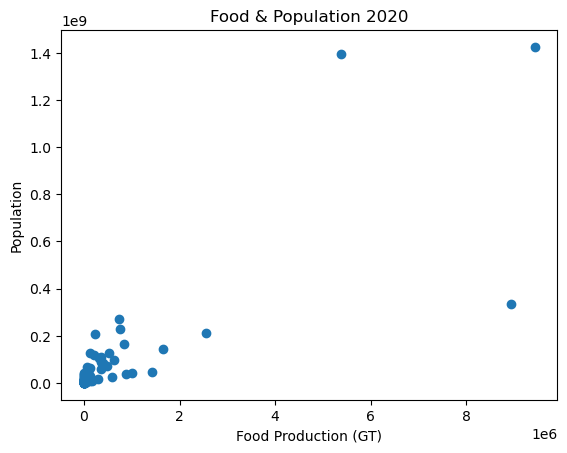

In [34]:
#2/21
foodVpop_2020 = plt.subplot()

foodVpop_2020.scatter(food2_2020, popWfoodinfo_2020['2020 Population'])
foodVpop_2020.set_xlabel('Food Production (GT)')
foodVpop_2020.set_ylabel('Population')
foodVpop_2020.set_title('Food & Population 2020')
foodVpop_2020.set_label(food2_2020)

Text(0.5, 1.0, 'Food & Population 2015')

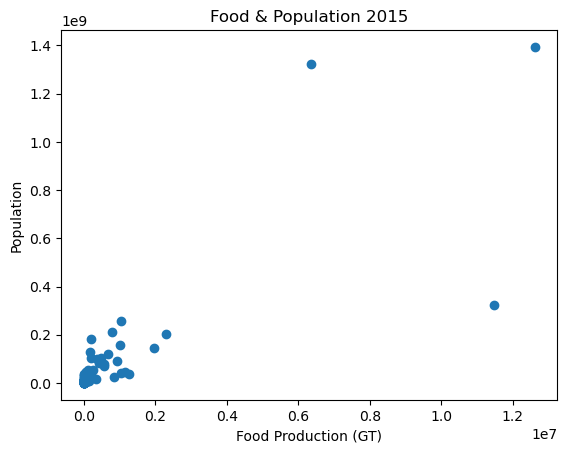

In [35]:
foodVpop_2015 = plt.subplot()
xfood = food2_2015
ypop = popWfoodinfo_2015['2015 Population']
foodVpop_2015.scatter(xfood, ypop)
foodVpop_2015.set_xlabel('Food Production (GT)')
foodVpop_2015.set_ylabel('Population')
foodVpop_2015.set_title('Food & Population 2015')

Text(0.5, 1.0, 'Food & Population 2010')

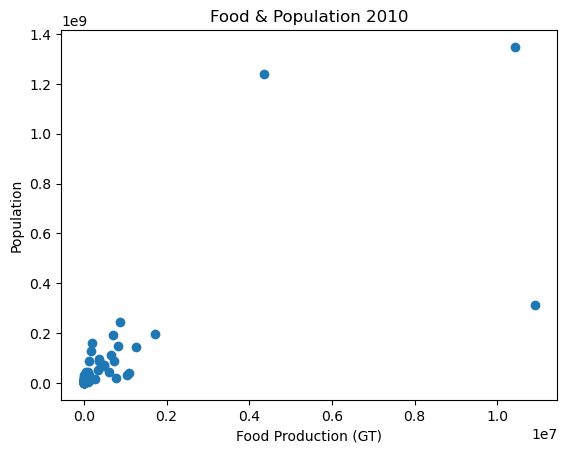

In [36]:
foodVpop_2010 = plt.subplot()
xfood = food2_2010
ypop = popWfoodinfo_2010['2010 Population']
foodVpop_2010.scatter(xfood, ypop)
foodVpop_2010.set_xlabel('Food Production (GT)')
foodVpop_2010.set_ylabel('Population')
foodVpop_2010.set_title('Food & Population 2010')

Text(0.5, 1.0, 'Food & Population 2000')

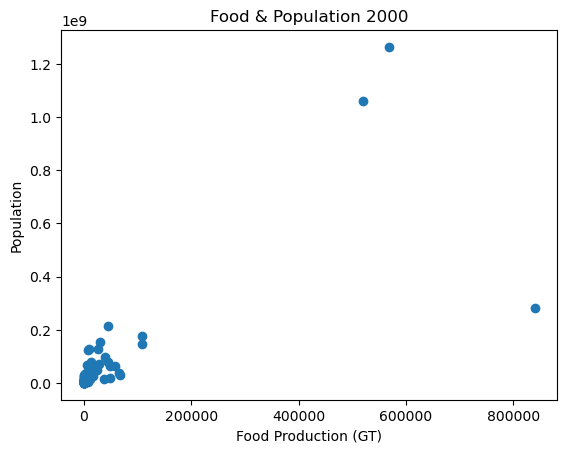

In [37]:
foodVpop_2000 = plt.subplot()
xfood = food2_2000
ypop = popWfoodinfo_2000['2000 Population']
foodVpop_2000.scatter(xfood, ypop)
foodVpop_2000.set_xlabel('Food Production (GT)')
foodVpop_2000.set_ylabel('Population')
foodVpop_2000.set_title('Food & Population 2000')

Text(0.5, 1.0, 'Food & Population 1990')

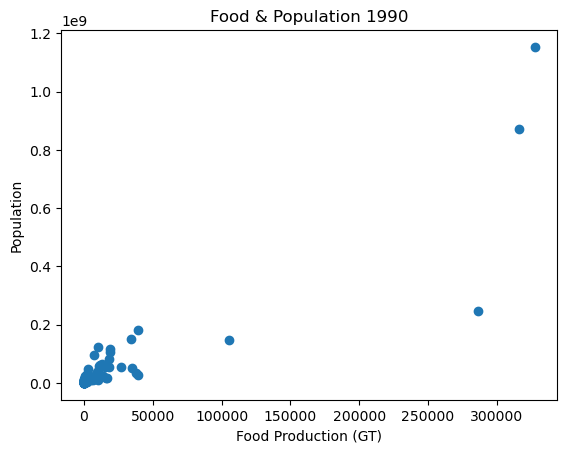

In [38]:
foodVpop_1990 = plt.subplot()
xfood = food2_1990
ypop = popWfoodinfo_1990['1990 Population']
foodVpop_1990.scatter(xfood, ypop)
foodVpop_1990.set_xlabel('Food Production (GT)')
foodVpop_1990.set_ylabel('Population')
foodVpop_1990.set_title('Food & Population 1990')

Text(0.5, 1.0, 'Food & Population 1980')

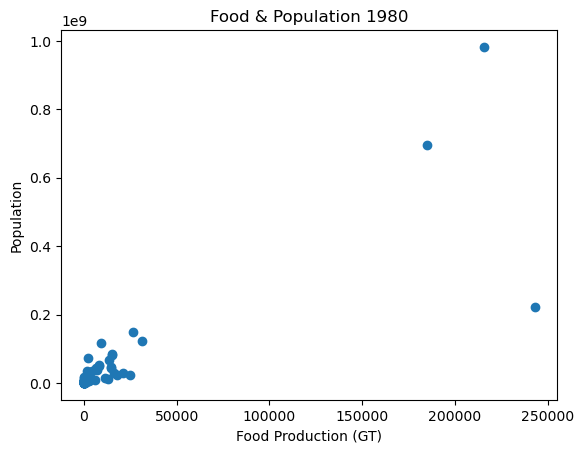

In [39]:
foodVpop_1980 = plt.subplot()
xfood = food2_1980
ypop = popWfoodinfo_1980['1980 Population']
foodVpop_1980.scatter(xfood, ypop)
foodVpop_1980.set_xlabel('Food Production (GT)')
foodVpop_1980.set_ylabel('Population')
foodVpop_1980.set_title('Food & Population 1980')

Text(0.5, 1.0, 'Food & Population 1970')

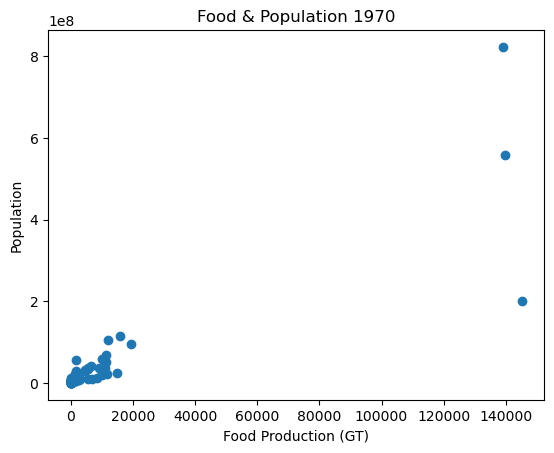

In [40]:
foodVpop_1970 = plt.subplot()
xfood = food2_1970
ypop = popWfoodinfo_1970['1970 Population']
foodVpop_1970.scatter(xfood, ypop)
foodVpop_1970.set_xlabel('Food Production (GT)')
foodVpop_1970.set_ylabel('Population')
foodVpop_1970.set_title('Food & Population 1970')

ValueError: x and y must be the same size

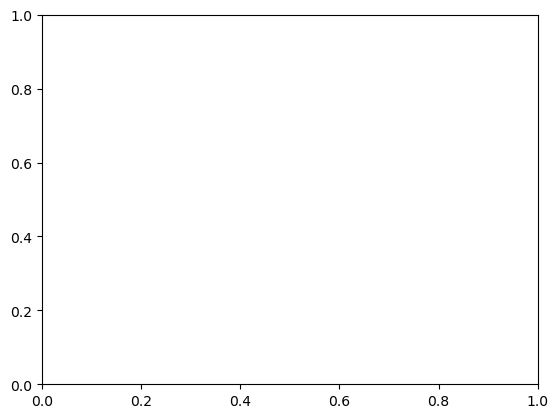

In [9]:
#failed 
plt.scatter(
    food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) & (food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2020), 'Value'], 
    pop2.loc[:, '2020 Population']
    )
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory'])]
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) & (food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2020)]
#corn produced by each country at 2020
#subtracts 143 rows with food2['Country_Name'].isin(pop2['Country/Territory']) & 
#some rows that should be gone, are not. like Angola
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) & (food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2020), "Value"]
pop2.loc[:, '2020 Population']
# population of the countries that produced the food. 
pop2.isin(food2['Country_Name'])
food2.loc[food2['Country_Name'].isin(pop2['Country/Territory']) == False]
food2.loc[(food2['Commodity_Description'] == 'Corn') & (food2['Year'] == 2019) & (food2['Country_Name'] == 'United States')]
pop2.loc[pop2['Country/Territory']=='United States']